## Анализ данных о производственных дефектах

Набор данных содержит сведенья связанные с производственными дефектами, наблюдаемые во время процессов контроля качества. Он включает в себя такую информацию как тип дефект, дата обнаружения, местоположение внутри продукта, уровень серьезности, используемый метод проверки и стоимость ремонта.

Этапы проведения анализа данных:


1.   Описание данных
2.   Очистка и предварительная обработка данных
3.   Анализ данных
4.   Выводы



### Описание данных

In [ ]:
#загрузка необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid", palette="deep")

In [ ]:
#загрузка файла с данными
url = '/content/drive/MyDrive/Datasets/Manufacturing defects/defects_data.csv'
data = pd.read_csv(url)

In [ ]:
data.head()

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
0,1,15,Structural,6/6/2024,Component,Minor,Visual Inspection,245.47
1,2,6,Functional,4/26/2024,Component,Minor,Visual Inspection,26.87
2,3,84,Structural,2/15/2024,Internal,Minor,Automated Testing,835.81
3,4,10,Functional,3/28/2024,Internal,Critical,Automated Testing,444.47
4,5,14,Cosmetic,4/26/2024,Component,Minor,Manual Testing,823.64


In [ ]:
data.shape

(1000, 8)

Файл с данными содержит таблицу с 8 столбцами  на 1000 строк. В столбцах представлена следующая информация:


*   defect_id - уникальный идентификатор для каждого дефекта
*   product_id - идентификатор продукта, связанного с дефектом
*   defect_type - тип или категория дефекта
*   defect_date - дата обнаружения дефекта
*   defect_location - место внутри изделия где был обнаружен дефект
*   severity - уровень серьезности дефекта
*   inspection_method - метод, используемый для обнаружения дефекта
*   repair_cost - расходы на утранение дефекта



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   defect_id          1000 non-null   int64  
 1   product_id         1000 non-null   int64  
 2   defect_type        1000 non-null   object 
 3   defect_date        1000 non-null   object 
 4   defect_location    1000 non-null   object 
 5   severity           1000 non-null   object 
 6   inspection_method  1000 non-null   object 
 7   repair_cost        1000 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


Рассмотрим общую статистическую информацию о данных

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
defect_id,1000.0,500.50000,288.819436,1.00,250.7500,500.50,750.250,1000.00
product_id,1000.0,50.83700,29.480935,1.00,26.0000,51.00,77.000,100.00
repair_cost,1000.0,507.62715,289.623615,10.22,270.9025,506.43,759.065,999.64


Рассмотрим типы дефектов, встречающихся в производстве

In [ ]:
data['defect_type'].value_counts()

,count
defect_type,
Structural,352
Functional,339
Cosmetic,309


В процессе контроля качетсва выявляют три вида дефектов:


1.   Структурный дефект
2.   Функциональный дефект
3.   Косметический дефект



Место в изделии, где выявляются дефекты

In [ ]:
data['defect_location'].value_counts()

,count
defect_location,
Surface,353
Component,326
Internal,321




1.   На поверхности изделия
2.   Дефект изделия
3.   Внутренний дефект



Степень серьезности дефекта

In [ ]:
data['severity'].value_counts()

,count
severity,
Minor,358
Critical,333
Moderate,309




1.   Незначительный дефект
2.   Умеренный дефект
3.   Критический дефект



Методы обнаружения дефектов

In [ ]:
data['inspection_method'].value_counts()

,count
inspection_method,
Manual Testing,352
Visual Inspection,351
Automated Testing,297




1.   Ручное тестирование
2.   Визуальный осмотр
3.   Автоматическое тестирование



### Очистка и предварительная обработка данных

Проверим данные на отсутствующие значения

In [ ]:
data.isnull().sum()

,0
defect_id,0
product_id,0
defect_type,0
defect_date,0
defect_location,0
severity,0
inspection_method,0
repair_cost,0


В данных нет отсутствующих значений

Проверим данные на наличие дубликатов

In [ ]:
data.duplicated().sum()

0

Дубликаты в данных осутствуют

Для анализа временных рядов необходимо привести данные даты к типу данных "datetime"

In [ ]:
data['defect_date'] = data['defect_date'].astype('datetime64[ns]')

### Анализ данных

Проанализируем соотношение между типами дефектов встречающихся в производсте

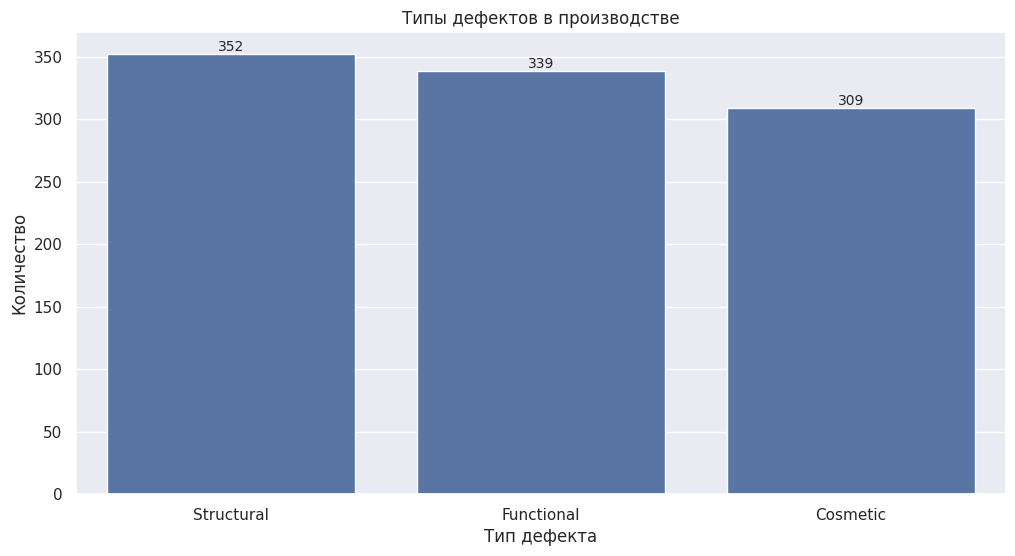

In [ ]:
plt.figure(figsize = (12, 6))
ax = sns.countplot(data = data, x = 'defect_type', order = data['defect_type'].value_counts().index)
plt.title('Типы дефектов в производстве')
plt.xlabel('Тип дефекта')
plt.ylabel('Количество')
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

На производстве преобладают стуктурные дефекты в деталях. Наименьшее количество- это косметические дефекты. Разница в количественном соотношении между ними не велика.

Проведем анализ соотношения типов обнаружения дефектов

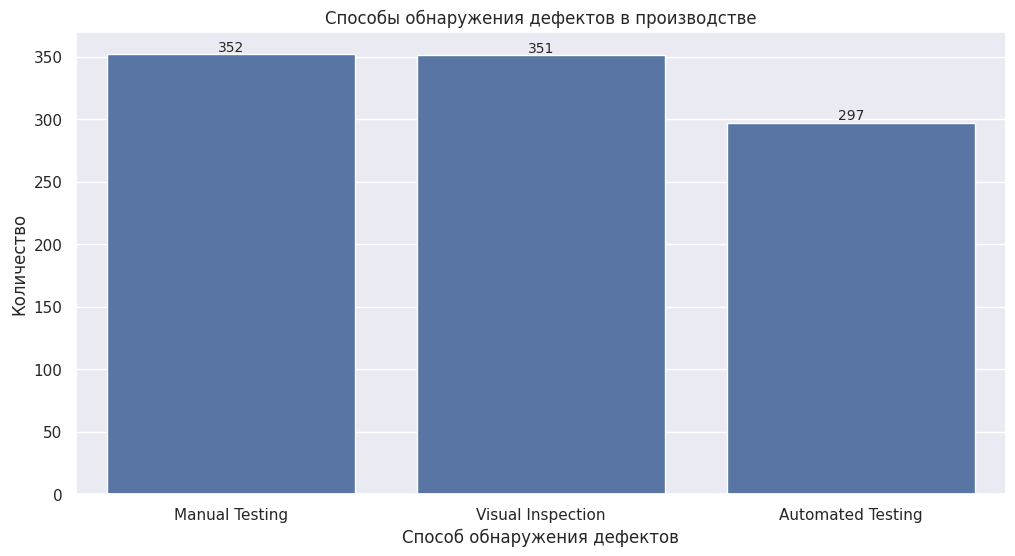

In [ ]:
plt.figure(figsize = (12, 6))
ax = sns.countplot(data = data, x = 'inspection_method', order = data['inspection_method'].value_counts().index)
plt.title('Способы обнаружения дефектов в производстве')
plt.xlabel('Способ обнаружения дефектов')
plt.ylabel('Количество')
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

Большая часть дефектов обнаружена с помощью визуального осмотра и ручного тестирования

Рассмотрим, где наиболее часто встречаются дефекты изделий

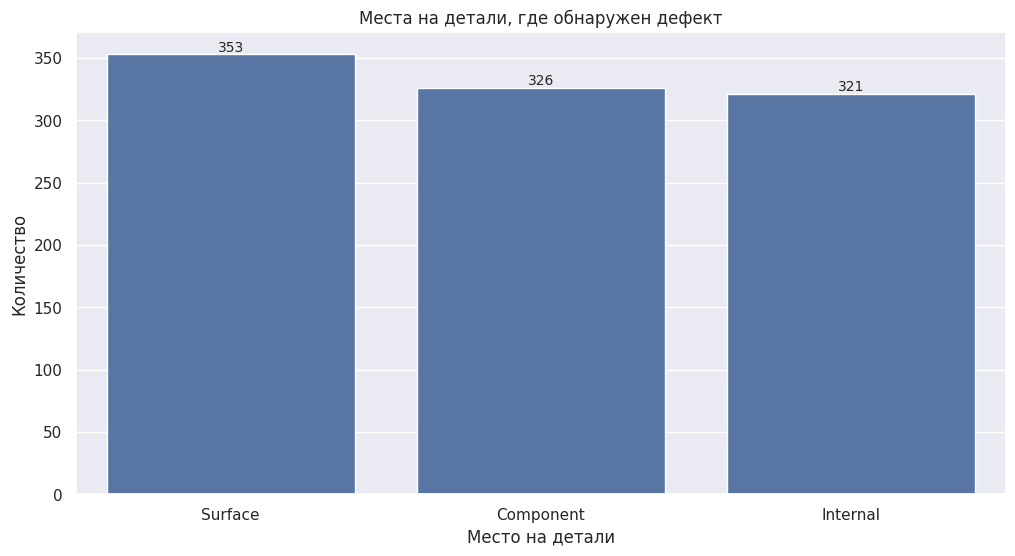

In [ ]:
plt.figure(figsize = (12, 6))
ax = sns.countplot(data = data, x = 'defect_location', order = data['defect_location'].value_counts().index)
plt.title('Места на детали, где обнаружен дефект')
plt.xlabel('Место на детали')
plt.ylabel('Количество')
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

Наибольшее количество дефектов обнаружено на поверхности деталей. Различие с остальными не очень значительно.

Проанализируем на сколько серьезны обнаруженные дефекты

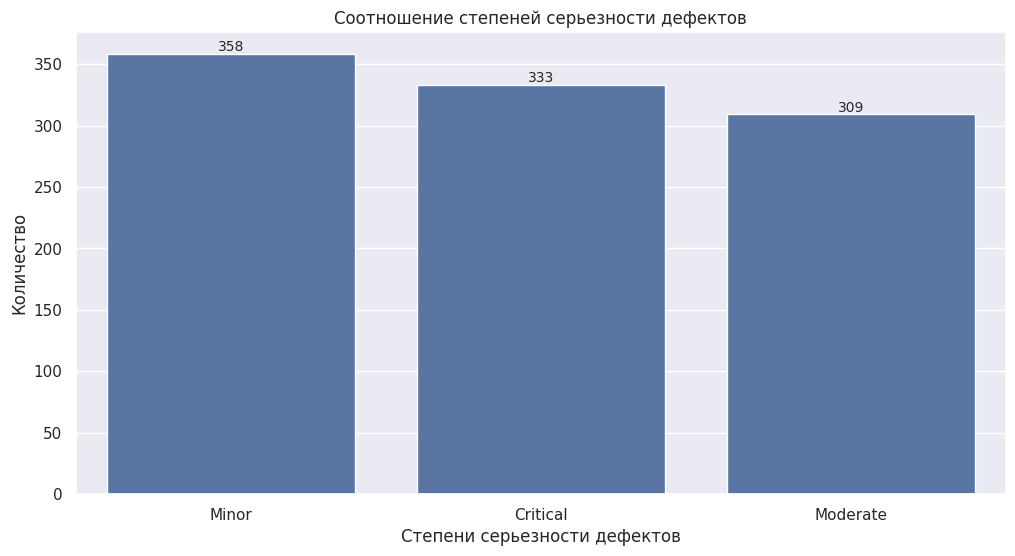

In [ ]:
plt.figure(figsize = (12, 6))
ax = sns.countplot(data = data, x = 'severity', order = data['severity'].value_counts().index)
plt.title('Соотношение степеней серьезности дефектов')
plt.xlabel('Степени серьезности дефектов')
plt.ylabel('Количество')
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

На первом месте по количеству - незначительные дефекты, затем критические дефекты и умеренные дефекты. Различия в количественном значении не представляют собой большую разницу.

Рассмотрим количество брака относительно даты

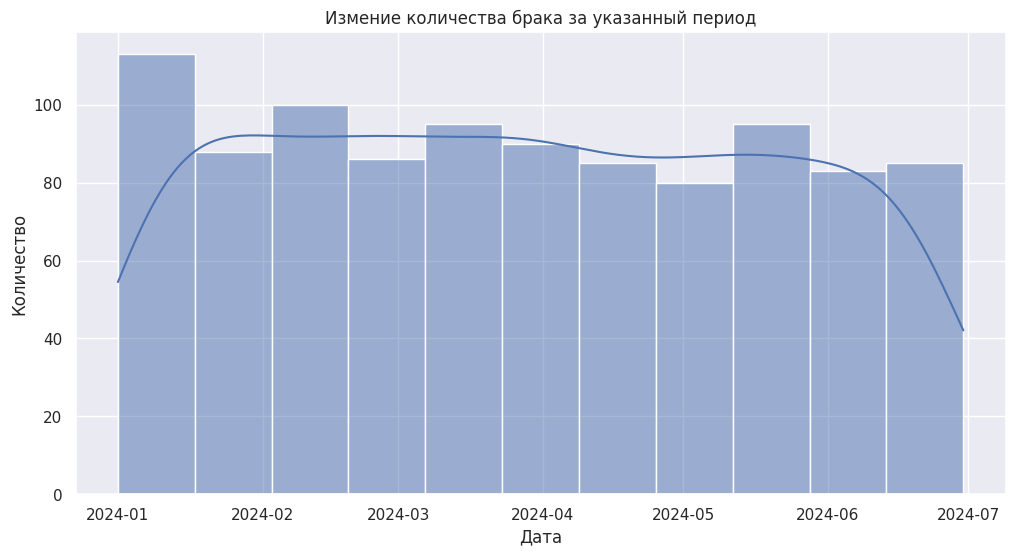

In [ ]:
plt.figure(figsize = (12, 6))
sns.histplot(data = data, x = 'defect_date', kde= True,)
plt.title('Измение количества брака за указанный период')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.show()

Наблюдается небольшое снижение общего количества брака в течении периода наблюдения

Рассмотрим расходы и изменеие стоимости исправления брака за указанный период времени

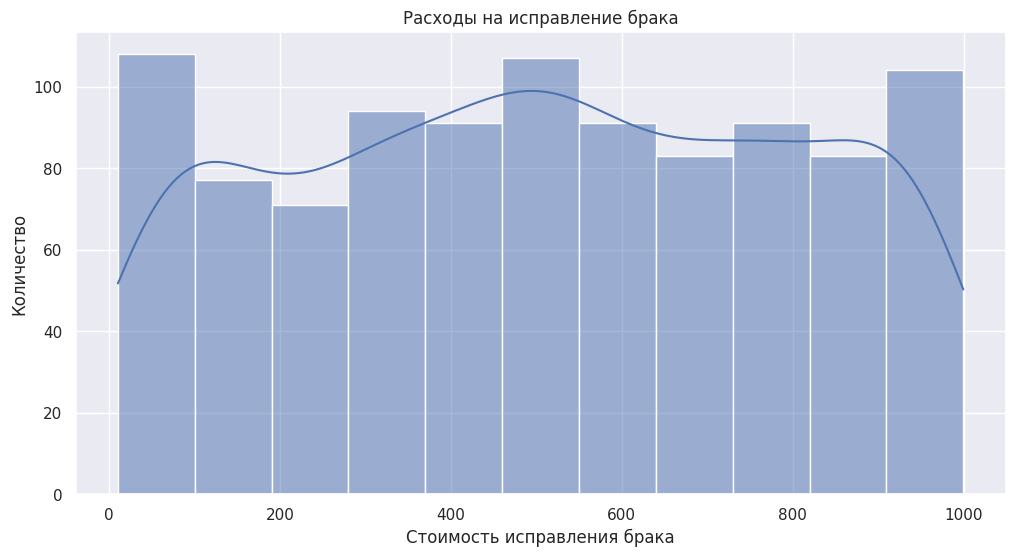

In [ ]:
plt.figure(figsize = (12, 6))
sns.histplot(data = data, x = 'repair_cost', kde= True)
plt.title('Расходы на исправление брака')
plt.xlabel('Стоимость исправления брака')
plt.ylabel('Количество')
plt.show()

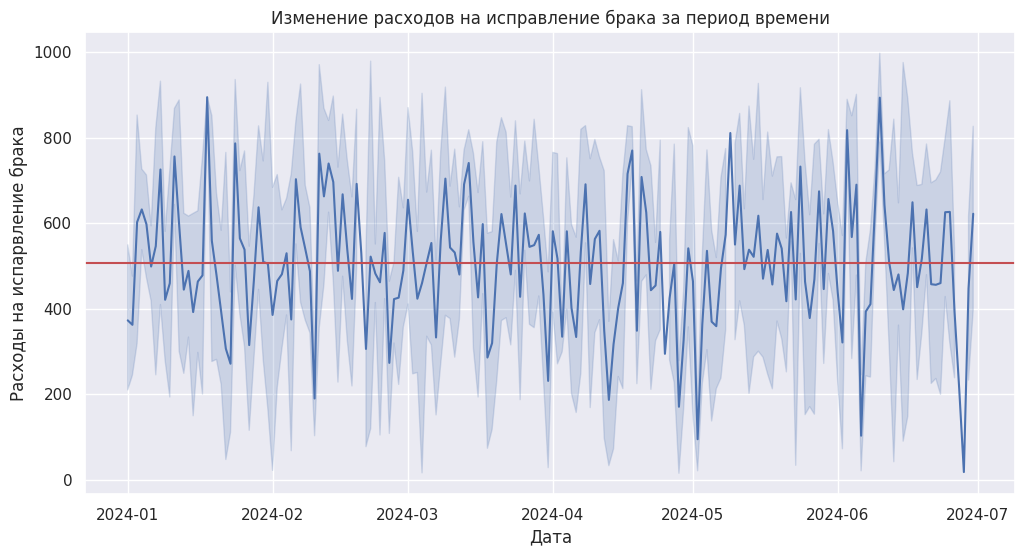

In [ ]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = data, x = 'defect_date', y = 'repair_cost')
plt.title('Изменение расходов на исправление брака за период времени')
plt.xlabel('Дата')
plt.ylabel('Расходы на испарвление брака')
plt.axhline(y=np.mean(data['repair_cost']), color = 'r')
plt.show()

Наблюдаются повышенные расходы на исправление брачных детелей, значительно высока доля больших затрат. На всем протяжении времени наблюдаюся как спады расходов на исправление брака, так и значительные спады. Среднее значение остается постоянным за весь отрезок времени.

Сгруппируем время наблюдения по месяцам, чтобы увидеть более наглядно изменение показателей в течении наблюдаемого периода.

In [ ]:
data['date_month'] = data['defect_date'].dt.month

In [ ]:
data.head()

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost,date_month
0,1,15,Structural,2024-06-06,Component,Minor,Visual Inspection,245.47,6
1,2,6,Functional,2024-04-26,Component,Minor,Visual Inspection,26.87,4
2,3,84,Structural,2024-02-15,Internal,Minor,Automated Testing,835.81,2
3,4,10,Functional,2024-03-28,Internal,Critical,Automated Testing,444.47,3
4,5,14,Cosmetic,2024-04-26,Component,Minor,Manual Testing,823.64,4


In [ ]:
group_defect_month = data.groupby(['date_month', 'defect_type', 'severity']).agg(defect_count = ('defect_id', 'count'), total_repair_cost = ('repair_cost', 'sum')).reset_index()

In [ ]:
group_defect_month.head()

,date_month,defect_type,severity,defect_count,total_repair_cost
0,1,Cosmetic,Critical,29,12739.81
1,1,Cosmetic,Minor,17,10575.63
2,1,Cosmetic,Moderate,19,10192.08
3,1,Functional,Critical,22,11628.93
4,1,Functional,Minor,17,8137.94


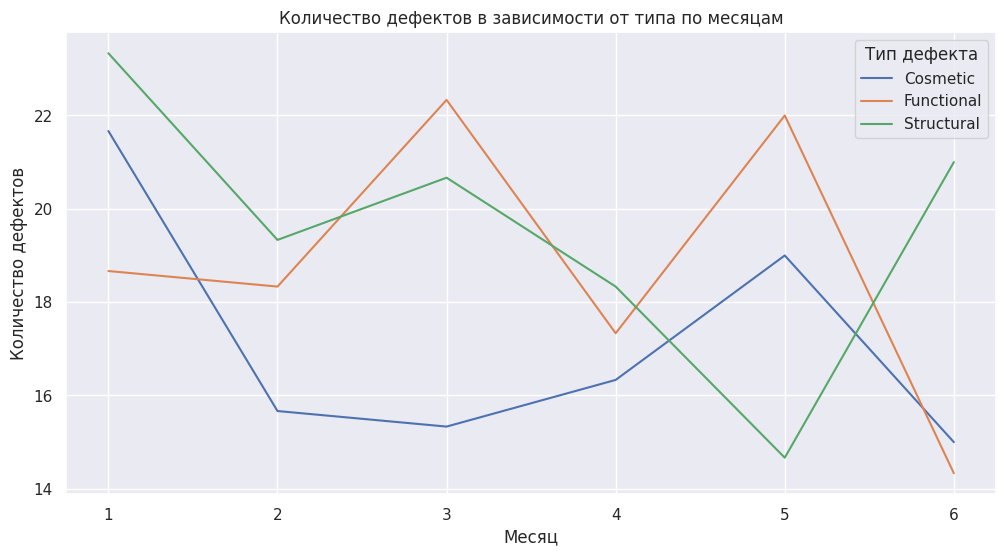

In [ ]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = group_defect_month, x = 'date_month', y = 'defect_count', hue = 'defect_type', errorbar= None)
plt.title('Количество дефектов в зависимости от типа по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество дефектов')
plt.legend(title = 'Тип дефекта')
plt.show()

Анилиз показывает что резкое снижение косметических дефектов вызывает увеличение других видов дефектов (наблюдается в третьем месяце). Также снижение структурных дефектов порождает увеличение косметических и функциональных (пятый месяц наблюдений). Оптимальным месяцем по совокупным показателям является четвертый месяц наблюдений.

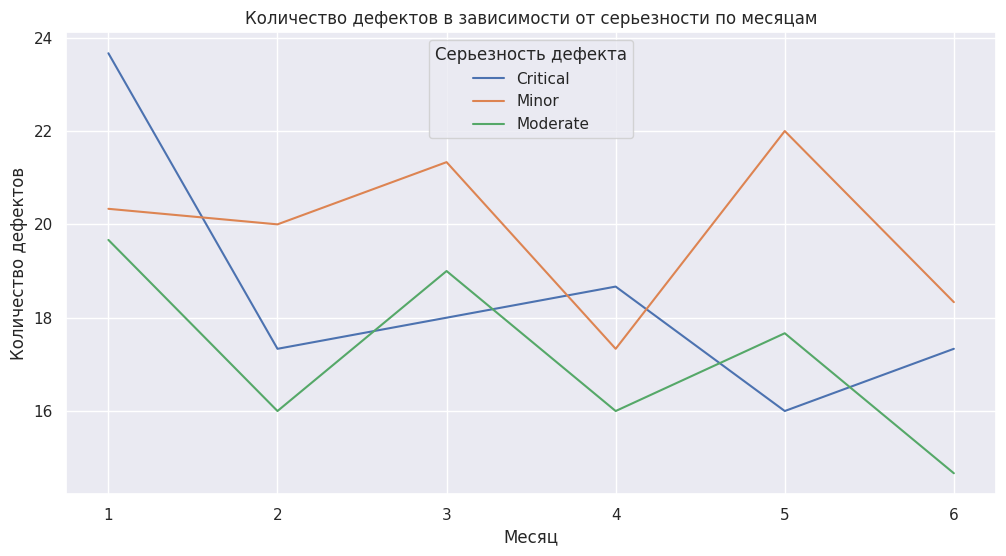

In [ ]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = group_defect_month, x = 'date_month', y = 'defect_count', hue = 'severity', errorbar= None)
plt.title('Количество дефектов в зависимости от серьезности по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество дефектов')
plt.legend(title = 'Серьезность дефекта')
plt.show()

Наблюдается положительная корреляция между не значительными дефектами и дефектами средней степени серьезности. Снижение одних дефектов приводит к снижению других. К ним отрицательно коррелируют критические дефекты, которые напротив возрастают в этот период времени. Минимум по критическим дефектам приходится на пятый месяц наблюдений, здесь же мы видим максимум по незначительным дефектам.

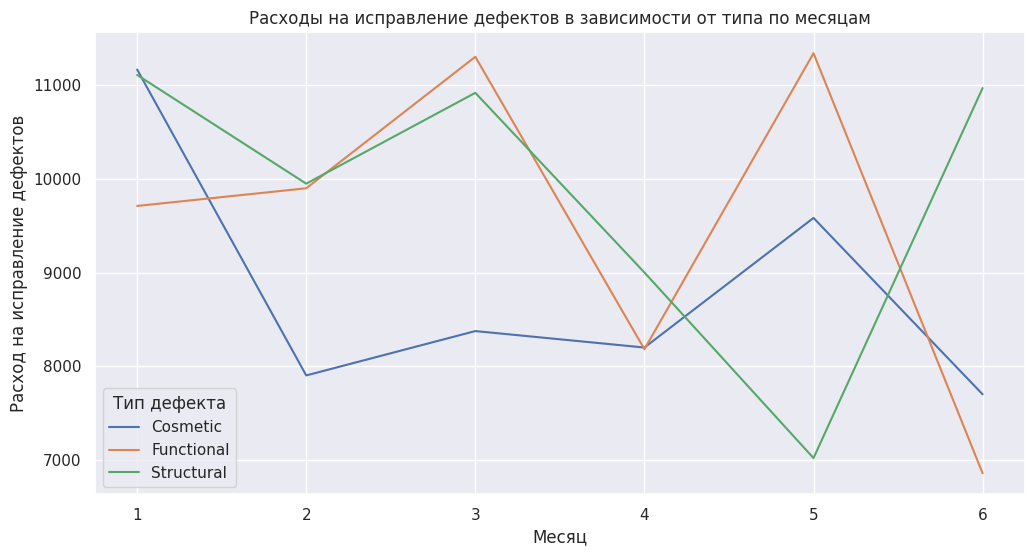

In [ ]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = group_defect_month, x = 'date_month', y = 'total_repair_cost', hue = 'defect_type', errorbar= None)
plt.title('Расходы на исправление дефектов в зависимости от типа по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Расход на исправление дефектов')
plt.legend(title = 'Тип дефекта')
plt.show()

Оптимальным месяцем по расходам на исправление дефектов является четвертый месяц наблюдений.

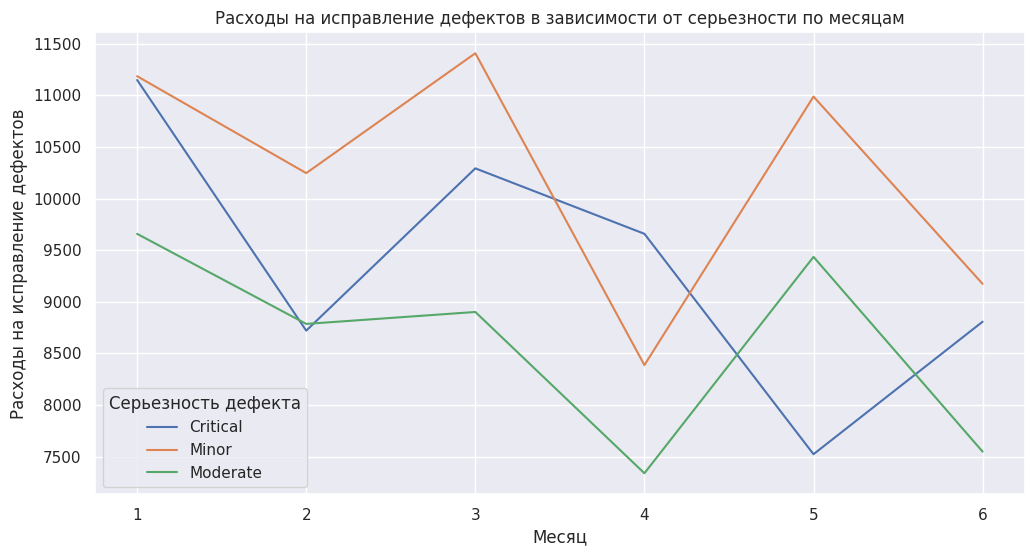

In [ ]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = group_defect_month, x = 'date_month', y = 'total_repair_cost', hue = 'severity', errorbar= None)
plt.title('Расходы на исправление дефектов в зависимости от серьезности по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Расходы на исправление дефектов')
plt.legend(title = 'Серьезность дефекта')
plt.show()

Далее проведем наблюдение как меняются расходы на исправление брака в зависимости от следующих показателей:

*   Тип дефекта
*   Локализация дефекта
*   Метод обнаружения
*   Серьезность дефекта



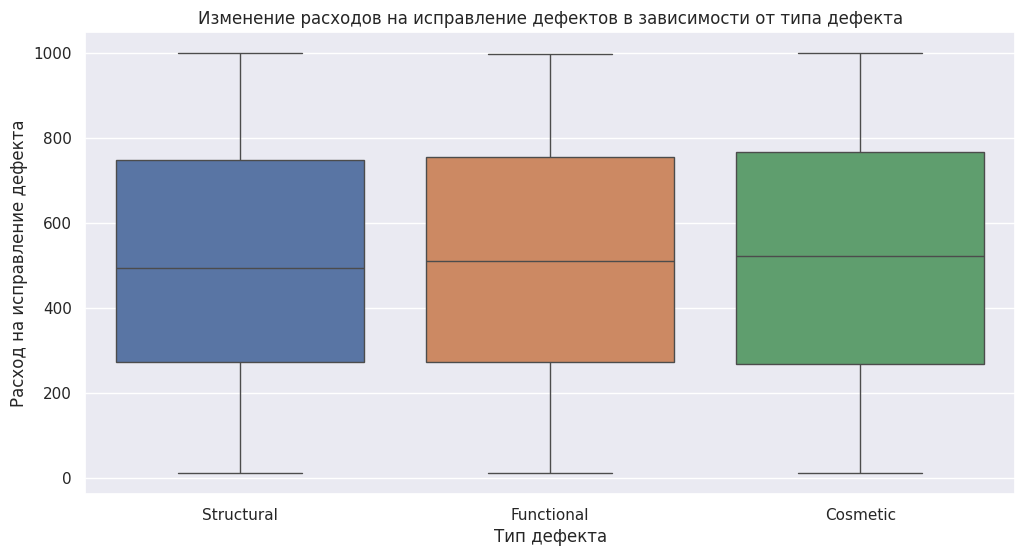

In [ ]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = data, x = 'defect_type', y = 'repair_cost', hue = 'defect_type')
plt.title('Изменение расходов на исправление дефектов в зависимости от типа дефекта')
plt.xlabel('Тип дефекта')
plt.ylabel('Расход на исправление дефекта')
plt.show()

Расходы на исправление брака деталей в зависимости от типа дефектов различаются незначительно. Выбросы отсутствуют.

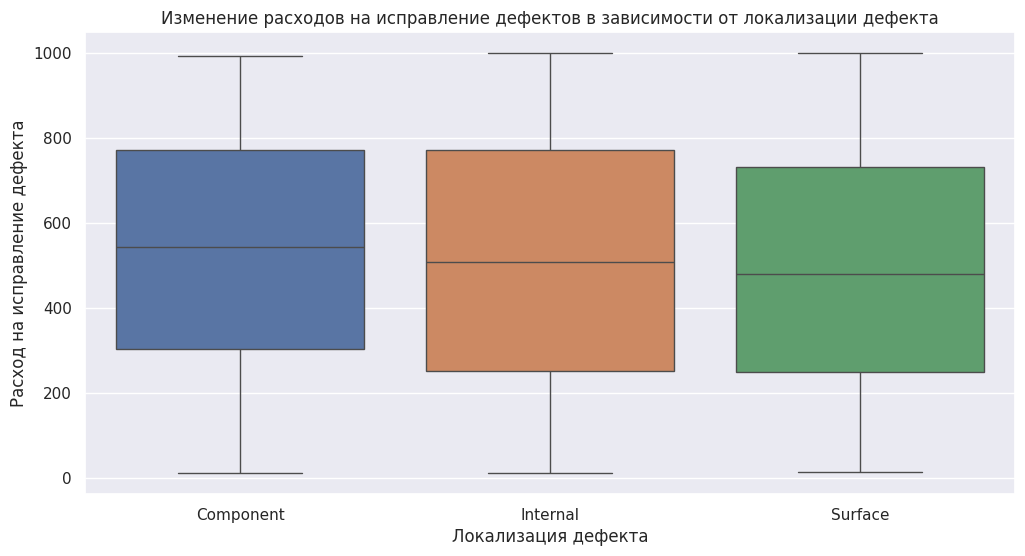

In [ ]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = data, x = 'defect_location', y = 'repair_cost', hue = 'defect_location')
plt.title('Изменение расходов на исправление дефектов в зависимости от локализации дефекта')
plt.xlabel('Локализация дефекта')
plt.ylabel('Расход на исправление дефекта')
plt.show()

Расходы на исправление изделий в зависимости от локализации дефектов не имеют сильно выраженных различий. Незначительно ниже по стоимости исправления дефекты поверхности (верхний квартиль расположен ниже), затем внутренний дефект и дефект компонента (здесь нижний квартиль находится выше других). Отсутствуют выбросы.

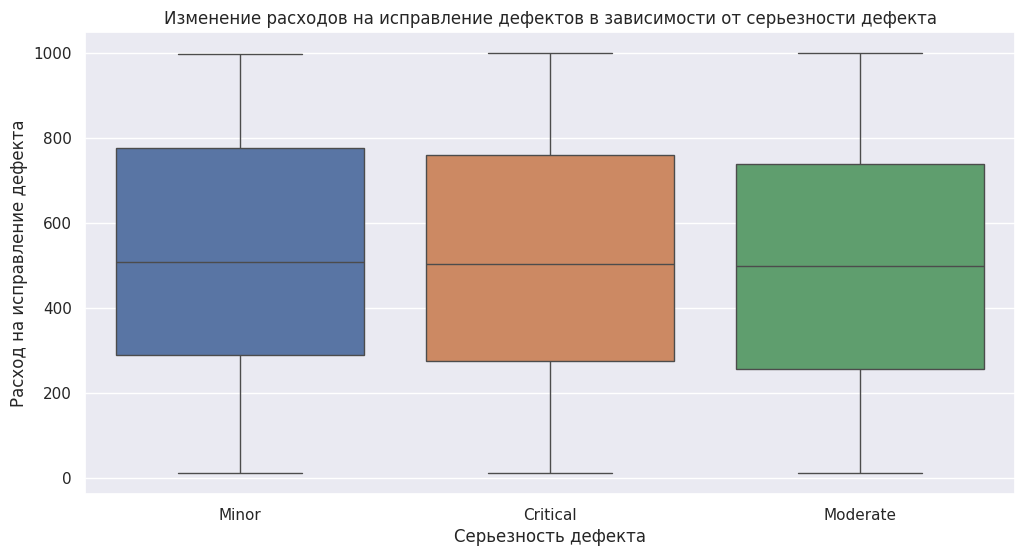

In [ ]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = data, x = 'severity', y = 'repair_cost', hue = 'severity')
plt.title('Изменение расходов на исправление дефектов в зависимости от серьезности дефекта')
plt.xlabel('Серьезность дефекта')
plt.ylabel('Расход на исправление дефекта')
plt.show()

Здесь мы также наблюдаем небольшие отличия в расходах на ремонт в зависимости от серьезности дефекта. Межквартильный размах практически одинаков у всех данных. Однако верхний квартиль расположен всех ниже у дефектов средней степени, а небольшое смещение медианы в меньшую сторону наблюдается у незначительных дефектов. Отсутсвуют выбросы.

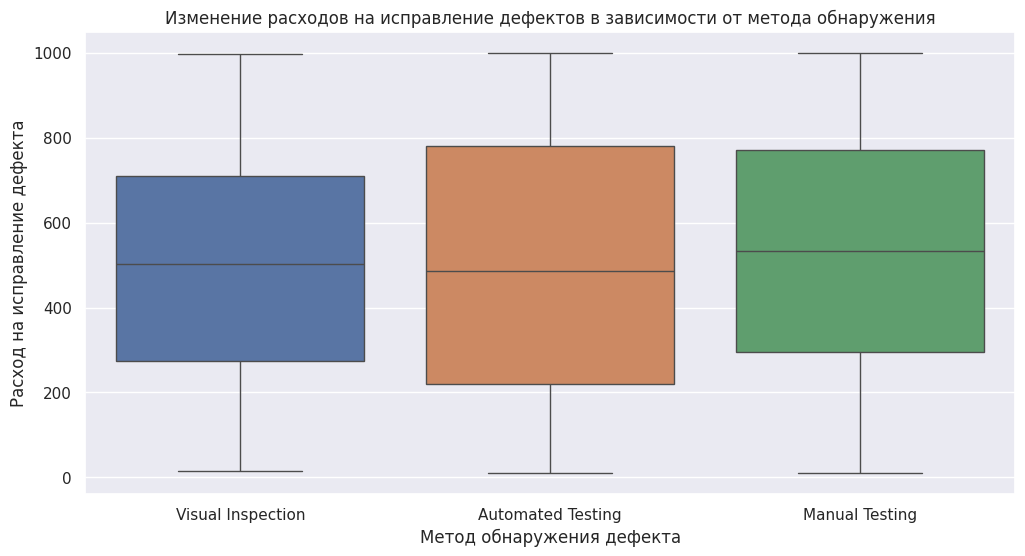

In [ ]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = data, x = 'inspection_method', y = 'repair_cost', hue = 'inspection_method')
plt.title('Изменение расходов на исправление дефектов в зависимости от метода обнаружения')
plt.xlabel('Метод обнаружения дефекта')
plt.ylabel('Расход на исправление дефекта')
plt.show()

Наименьший межквартильный размах наблюдается при визуальном осмотре, наибольший при автоматическом тестирование. Наименьшее значение верхнего квартиля также у визуального осмотра, а наибольшее при автоматическом тестированиии. Следовательно самый дешевый способ обнаружения дефектов - это визуальный осмотр, а самый затратный - автоматическое тестирование.

Далее проанализируем выпускаемые детали на количество брака и расходов нв исправление. Посмотрим на топ - 20 изделий, по количеству обнаруженного брака

In [ ]:
group_product_id = data.groupby('product_id').agg(count_defect = ('product_id', 'count'), sum_repair_cost = ('repair_cost', 'sum')).sort_values(by = 'count_defect', ascending = False).reset_index()

In [ ]:
group_product_id

,product_id,count_defect,sum_repair_cost
0,63,20,9174.06
1,81,20,11740.64
2,97,19,8405.84
3,56,18,9916.30
4,4,16,6495.45
...,...,...,...
95,89,4,2471.16
96,52,4,1647.65
97,85,4,1337.25
98,19,4,1982.36


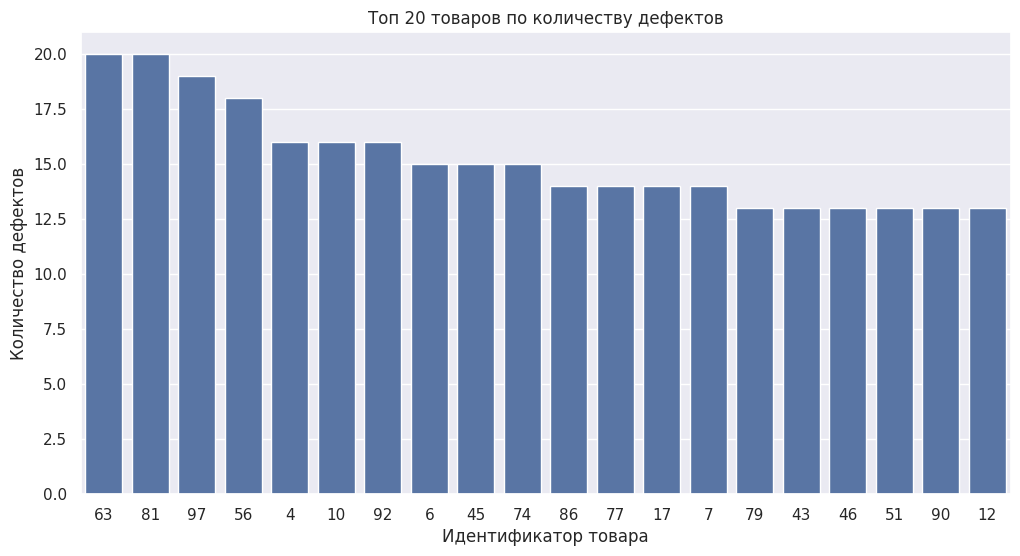

In [ ]:
data_prod = group_product_id[:20]
plt.figure(figsize = (12, 6))
sns.barplot(data = data_prod, x = 'product_id', y = 'count_defect', order= data_prod['product_id'])
plt.title('Топ 20 товаров по количеству дефектов')
plt.xlabel('Идентификатор товара')
plt.ylabel('Количество дефектов')
plt.show()

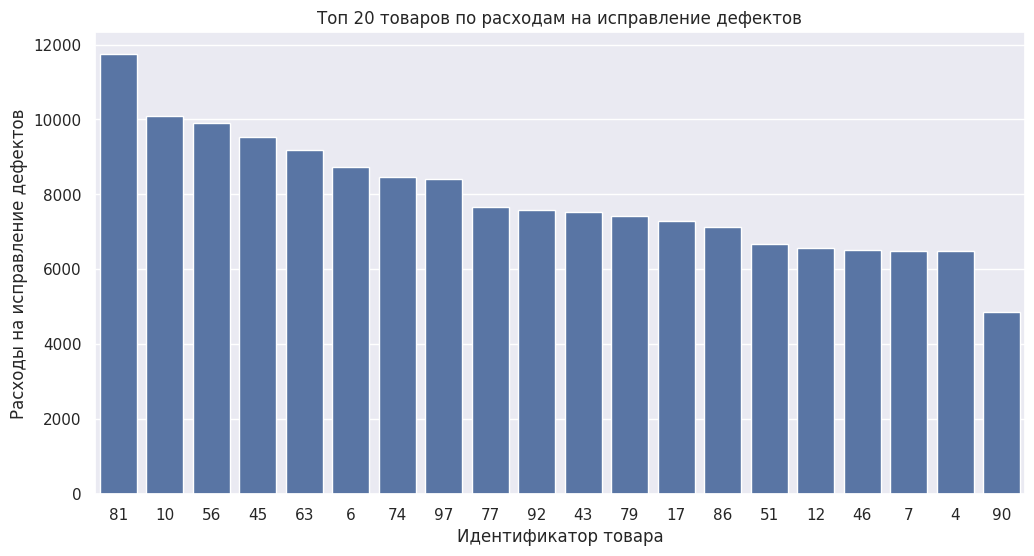

In [ ]:
data_rapair = data_prod.copy()
data_rapair = data_rapair.sort_values(by = 'sum_repair_cost', ascending = False)
plt.figure(figsize = (12, 6))
sns.barplot(data = data_rapair, x = 'product_id', y = 'sum_repair_cost', order = data_rapair['product_id'])
plt.title('Топ 20 товаров по расходам на исправление дефектов')
plt.xlabel('Идентификатор товара')
plt.ylabel('Расходы на исправление дефектов')
plt.show()

### Выводы

В ходе анализа получаем следующие результаты:


1.   Самое большое количество дефектов обнаруживается на визуальном контроле, что логично, так как это первый этап в контроле качества изделий и самый менее затратный способ
2.  Снижение одних видов дефектов ведет к увеличению других и наоборот. Необходимо стремится к снижению критических дефектов, не сильно увеличивая при этом остальные дефекты
3.  По показателя наблюдений оптимальным видится четвертый месяц наблюдений. Необходимо провести анализ производственных процессов в этом месяц и сравнить с другими месяцами наблюдений для выявления причит увеличения количества дефектов и расходов на их исправление
4.  Необходимо пристально изучить технологический процесс производства детелей из ТОП 20 по количеству дефектов и выявить причины их возникновения для дальнейшей оптимизации процесса

